<a href="https://colab.research.google.com/github/khanh22mse23057/python4engineer-assignments/blob/main/Assignments5-Superstore-Sales-Dataset-Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
train_raw_url = "https://gist.githubusercontent.com/pinkeraw/77a0bf3502c2786eb32bcb53275a31ac/raw/e2173cd84eb045812481156d7b4142d8af36876e/train.csv"
data = pd.read_csv(train_raw_url)

In [ ]:
# Cleaning data
data["Postal Code"] = data["Postal Code"].fillna(0)
data["Order Date"] = pd.to_datetime(data["Order Date"], format="%d/%m/%Y")
data["Ship Date"] = pd.to_datetime(data["Ship Date"], format="%d/%m/%Y")

Text(0, 0.5, 'Revenue (USD)')

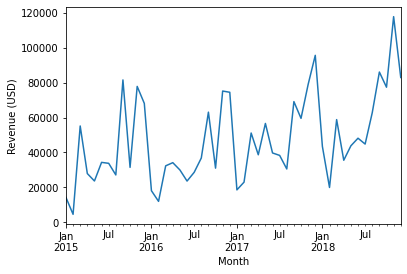

In [ ]:
# Revenue by month
revenue_by_month = data.groupby(pd.Grouper(key="Order Date", freq="M"))["Sales"].sum().plot()
revenue_by_month.set_xlabel("Month")
revenue_by_month.set_ylabel("Revenue (USD)")



In [ ]:
# Mean revenue in nearest 3 months
mean_revenue = data.sort_values(by="Order Date", ascending=True)\
    .set_index("Order Date")\
    .last("3M")["Sales"].mean()

print("Mean revenue in nearest 3 months: {} USD".format(round(mean_revenue, 2)))

Mean revenue in nearest 3 months: 230.29 USD


Text(0, 0.5, 'Revenue (USD)')

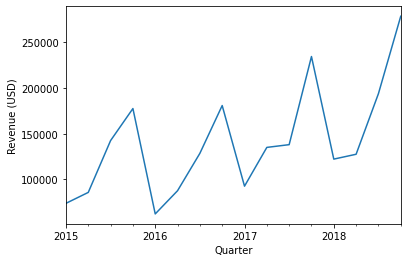

In [ ]:
# Revenue by quarter
revenue_by_quarter_data = data.groupby(pd.Grouper(key="Order Date", freq="Q"))["Sales"].sum()
revenue_by_quarter = revenue_by_quarter_data.plot()
revenue_by_quarter.set_xlabel("Quarter")
revenue_by_quarter.set_ylabel("Revenue (USD)")

In [ ]:
# Quarter with highest revenue
highest_quarter = revenue_by_quarter_data.idxmax()
highest_quarter_revenue = revenue_by_quarter_data[highest_quarter]

print("Quarter with highest revenue: {} with {} USD".format(highest_quarter, highest_quarter_revenue))

Quarter with highest revenue: 2018-12-31 00:00:00 with 278416.675 USD


Text(0, 0.5, 'Mean Delivery Time (Days)')

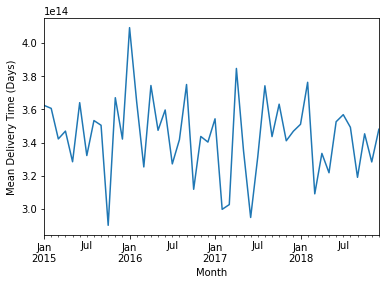

In [ ]:
# Mean delivery time
data["Delivery Time"] = data["Ship Date"] - data["Order Date"]
mean_delivery_time_by_month = data.groupby(pd.Grouper(key="Order Date", freq="M"))["Delivery Time"].mean().plot()
mean_delivery_time_by_month.set_xlabel("Month")
mean_delivery_time_by_month.set_ylabel("Mean Delivery Time (Days)")

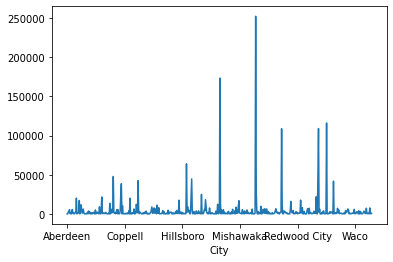

In [ ]:
# Revenue by City
revenue_by_city_data = data.groupby("City")["Sales"].sum()
revenue_by_city = revenue_by_city_data.plot()

In [ ]:
# Top 3 City with lowest revenue
print(revenue_by_city_data.nsmallest(3))
# Top 3 City with highest revenue
print(revenue_by_city_data.nlargest(3))

City
Abilene    1.392
Elyria     1.824
Jupiter    2.064
Name: Sales, dtype: float64
City
New York City    252462.547
Los Angeles      173420.181
Seattle          116106.322
Name: Sales, dtype: float64


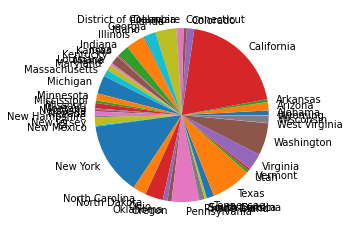

In [ ]:
# Percentage of revenue by State
revenue_by_state_data = data.groupby("State")["Sales"].sum()
revenue_by_state_data.plot(kind="pie")

In [ ]:
# Mean of top 5 state
mean_sales_top_5_state = revenue_by_state_data.nlargest(5).mean()
print("Mean of top 5 state: {}".format(round(mean_sales_top_5_state, 2)))

Mean of top 5 state: 234544.73


In [ ]:
# Top states in revenue by Region
revenue_by_region_state_data = data.groupby(["Region", "State"])["Sales"].sum().reset_index()
query_mask = revenue_by_region_state_data["Sales"] == revenue_by_region_state_data.groupby("Region")["Sales"].transform("max")
print(revenue_by_region_state_data[query_mask])

     Region       State        Sales
11  Central       Texas  168572.5322
21     East    New York  306361.1470
29    South     Florida   88436.5320
39     West  California  446306.4635


In [ ]:
# Top 3 products with highest revenue
sum_revenue_by_product = data.groupby(["Product ID", "Product Name"])["Sales"].sum()
print(sum_revenue_by_product.nlargest(3))

Product ID       Product Name                                                               
TEC-CO-10004722  Canon imageCLASS 2200 Advanced Copier                                          61599.824
OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind    27453.384
TEC-MA-10002412  Cisco TelePresence System EX90 Videoconferencing Unit                          22638.480
Name: Sales, dtype: float64


In [ ]:
# Top 3 products with highest quantity
count_revenue_by_product = data.groupby(["Product ID", "Product Name"])["Sales"].count()
print(count_revenue_by_product.nlargest(3))

Product ID       Product Name                                             
FUR-CH-10002647  Situations Contoured Folding Chairs, 4/Set                   15
TEC-AC-10003628  Logitech 910-002974 M325 Wireless Mouse for Web Scrolling    15
FUR-CH-10002880  Global High-Back Leather Tilter, Burgundy                    14
Name: Sales, dtype: int64


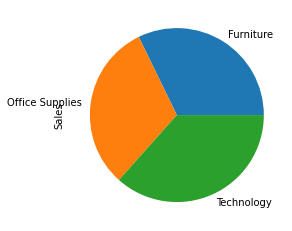

In [ ]:
# Percentage of revenue by Category
revenue_by_category_data = data.groupby("Category")["Sales"].sum()
revenue_by_category_data.plot(kind="pie")